# Acceptance map that "ruins" GENIE samples to mimic the detector

In [1]:
import sys; sys.path.insert(0, '../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
%matplotlib inline

versions:
{   'OffBeam': 'prod_reco_optfilter_extbnb_v12_mcc8_dev',
    'OnBeam': 'prod_reco_optfilter_bnb_v12_unblind_mcc8',
    'Overlay': 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2',
    'data date': '2018_05_11',
    'date': '2018_05_11',
    'overlay date': '2018_05_11'}
OffBeam_scaling: 0.706302660161 = N(on beam)/N(off beam) before SwT
f(POT): 0.0512441465374 = N(POT on beam)/N(POT MC)


In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/acceptance/'

In [3]:
versions['data date'] = '2018_05_11'
versions['overlay date'] = '2018_05_11'
versions['Overlay'] = 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2'

In [4]:
OnBeam = pd.concat([pd.read_csv(vertices_files_path+'/'+versions['data date']+'/'+versions['OnBeam']+'_04_'+versions['data date']+'_vertices.csv')
                    ,pd.read_csv(vertices_files_path+'/'+versions['data date']+'/'+versions['OnBeam']+'_05_'+versions['data date']+'_vertices.csv')])
OnBeamFV = sample_in_FV(OnBeam)
print "%d"%len(OnBeam)+' pairs from On-Beam, %d'%len(OnBeamFV)+' in Fiducial Volume'; print_line()

_,OverlaySamples = load_MCbnbDATAcosmicSamples(date=versions['overlay date'],filename=versions['Overlay']+'_'+versions['overlay date']+'_vertices')

38163 pairs from On-Beam, 24323 in Fiducial Volume
--------------------------------------------------------------
283762 pairs from MC-BNB + cosmic DATA overlay
186485 pairs in FV
49707 are 1mu-1p, 26.7%
41519 are other pairs, 22.3%
95259 are cosmic, 51.1%
--------------------------------------------------------------
23996 are CC 1p 0pi, 12.9%


## re-scaling of the cosmic in the overlay, and application of the cuts

In [5]:
cuts_order  = ['no cut','Chi2Proton','MatchedFlash','length','non-collinearity','vertex activity','delta phi','Pt & delta phi']
overlay_scalings = dict()
f_Cosmic=0.8658
overlay_scalings['N(On) scaling and f(cosmic)=%.3f'%f_Cosmic] = get_samples_scaling( N_total= float(len(OnBeamFV)), f_Cosmic=f_Cosmic, OverlaySubsamples=OverlaySamples)
print 'overlay scalings';pp.pprint(overlay_scalings)
reducedOverlay,pureffOverlay,pureffNumbers = apply_cuts_to_overlay(OverlaySamples=OverlaySamples, cuts_order=cuts_order
                                                                   ,overlay_scaling=overlay_scalings['N(On) scaling and f(cosmic)=%.3f'%f_Cosmic])
print 'applied cuts to overlay'
reducedOnBeam,BeamOnNumbers = apply_cuts_to_data(OnBeamFV=OnBeamFV,cuts_order=cuts_order)
print 'applied cuts to data'

overlay scalings
{   'N(On) scaling and f(cosmic)=0.866': {   '1mu-1p': 0.03578088045074869,
                                             'CC 1p 0pi': 0.03578088045074869,
                                             'N(Ovelay)/N(On)': 7.667022982362373,
                                             'cosmic': 0.22106943595880704,
                                             'other pairs': 0.03578088045074868}}
applied cuts to overlay
applied cuts to data


In [6]:
overlay_scaling = overlay_scalings['N(On) scaling and f(cosmic)=%.3f'%f_Cosmic]

In [7]:
selected_events = reducedOnBeam['Pt & delta phi']
print len(selected_events),'selected pairs in data'
selected_overlay=dict()
for pair_type in pair_types:
    selected_overlay[pair_type] = reducedOverlay['Pt & delta phi'][pair_type]
selected_CC1p0pi = selected_overlay['CC 1p 0pi']
print len(selected_CC1p0pi),'selected CC1p0π pairs in overlay'

350 selected pairs in data
7304 selected CC1p0π pairs in overlay


In [8]:
# tight FV
max_FV_y = 104 
min_FV_z,max_FV_z = 5,1020
min_FV_x,max_FV_x = 5,240

selected_overlay_tightFV=dict()
for pair_type in pair_types:
    selected_overlay_tightFV[pair_type] = sample_in_FV(selected_overlay[pair_type]
                                                       ,max_FV_y = max_FV_y ,min_FV_z = min_FV_z, max_FV_z = max_FV_z,min_FV_x = min_FV_x, max_FV_x = max_FV_x)
overlay_tightFV = pd.concat([selected_overlay_tightFV['1mu-1p'],selected_overlay_tightFV['cosmic'],selected_overlay_tightFV['other pairs']])
print len(selected_overlay_tightFV),'selected overlay in tight FV'
selected_CC1p0pi_tightFV = sample_in_FV(sample=selected_CC1p0pi
                                   ,max_FV_y = max_FV_y ,min_FV_z = min_FV_z, max_FV_z = max_FV_z,min_FV_x = min_FV_x, max_FV_x = max_FV_x)
print len(selected_CC1p0pi_tightFV),'selected CC1p0π in overlay in tight FV'
selected_events_tightFV = sample_in_FV(sample=selected_events
                                   ,max_FV_y = max_FV_y ,min_FV_z = min_FV_z, max_FV_z = max_FV_z,min_FV_x = min_FV_x, max_FV_x = max_FV_x)
print len(selected_events_tightFV),'selected pairs in data in tight FV'

4 selected overlay in tight FV
4064 selected CC1p0π in overlay in tight FV
182 selected pairs in data in tight FV


In [9]:
GENIEall = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/genie/2018_05_11/prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2_2018_05_11_genie.csv')
print len(GENIEall),' GENIE interaction'
GENIE_CC1p0pi = GENIEall[(GENIEall['IsCC_1p_200MeVc_0pi']==True)]
print len(GENIE_CC1p0pi),'GENIE CC1p0π events'

926088  GENIE interaction
243732 GENIE CC1p0π events


In [10]:
GENIE_CC1p0pi['truth_Pmu_cos_theta'] = np.cos(GENIE_CC1p0pi['truth_Pmu_theta'])
selected_CC1p0pi_tightFV['truth_Pmu_cos_theta'] = np.cos(selected_CC1p0pi_tightFV['truth_Pmu_theta'])
overlay_tightFV['truth_Pmu_cos_theta'] = np.cos(overlay_tightFV['truth_Pmu_theta'])

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [11]:
def theta_rad_label(theta):
    if theta==0: return "0"
    if np.abs(theta-np.pi)<0.001: return "$\pi$"
    for n in range(2,10): 
        if np.abs(theta-(np.pi/n))<0.001: 
            return "$\pi/%d$"%n
    return "$%.1f\pi$"%(theta/np.pi)

## overlay efficiency and purity as a function of $p_\mu$ and $\theta_\mu$

In [12]:
Pmu_bins = linspace(0,2,6)
Pmu_theta_bins = linspace(0,np.pi,6)
xbins,ybins = Pmu_bins,Pmu_theta_bins
xcenters,ycenters = 0.5*(xbins[1:]+xbins[:-1]),0.5*(ybins[1:]+ybins[:-1])
nx,ny = len(xbins)-1,len(ybins)-1
xvar,yvar = 'truth_Pmu','truth_Pmu_theta'
xticklabels=["%.1f"%x for x in xcenters]
yticklabels=[theta_rad_label(tick) for tick in ycenters]
x_label,y_label=r'$p_\mu$ (GeV/c)',r'$\theta_\mu$ [rad]'

## efficiency

In [13]:
generated = GENIE_CC1p0pi
accepted = selected_CC1p0pi_tightFV
hgen,hacc,heff,heff_err = np.zeros((nx,ny)),np.zeros((nx,ny)),np.zeros((nx,ny)),np.zeros((nx,ny))
for ix in range(nx):
    xmin,xmax = xbins[ix],xbins[ix+1]    #print "xmin,xmax:",xmin,xmax
    for iy in range(ny):
        ymin,ymax = ybins[iy],ybins[iy+1]        #print "ymin,ymax:",ymin,ymax        
        gen_bin = generated[(generated[xvar]>xmin)&(generated[xvar]<xmax)
                            &(generated[yvar]>ymin)&(generated[yvar]<ymax)]
        hgen[ix][iy] = len(gen_bin)        
        acc_bin = accepted[(accepted[xvar]>xmin)&(accepted[xvar]<xmax)
                            &(accepted[yvar]>ymin)&(accepted[yvar]<ymax)]
        hacc[ix][iy] = len(acc_bin)        
        heff[ix][iy] = float(hacc[ix][iy])/(hgen[ix][iy] if hgen[ix][iy]>0 else 1)
        heff_err[ix][iy] = heff[ix][iy]*np.sqrt( (1./hgen[ix][iy] if hgen[ix][iy] else 0)
                                                + (1./hacc[ix][iy] if hacc[ix][iy] else 0) )
hgen,hacc,heff,heff_err=hgen.T,hacc.T,heff.T,heff_err.T
print 'done'

done


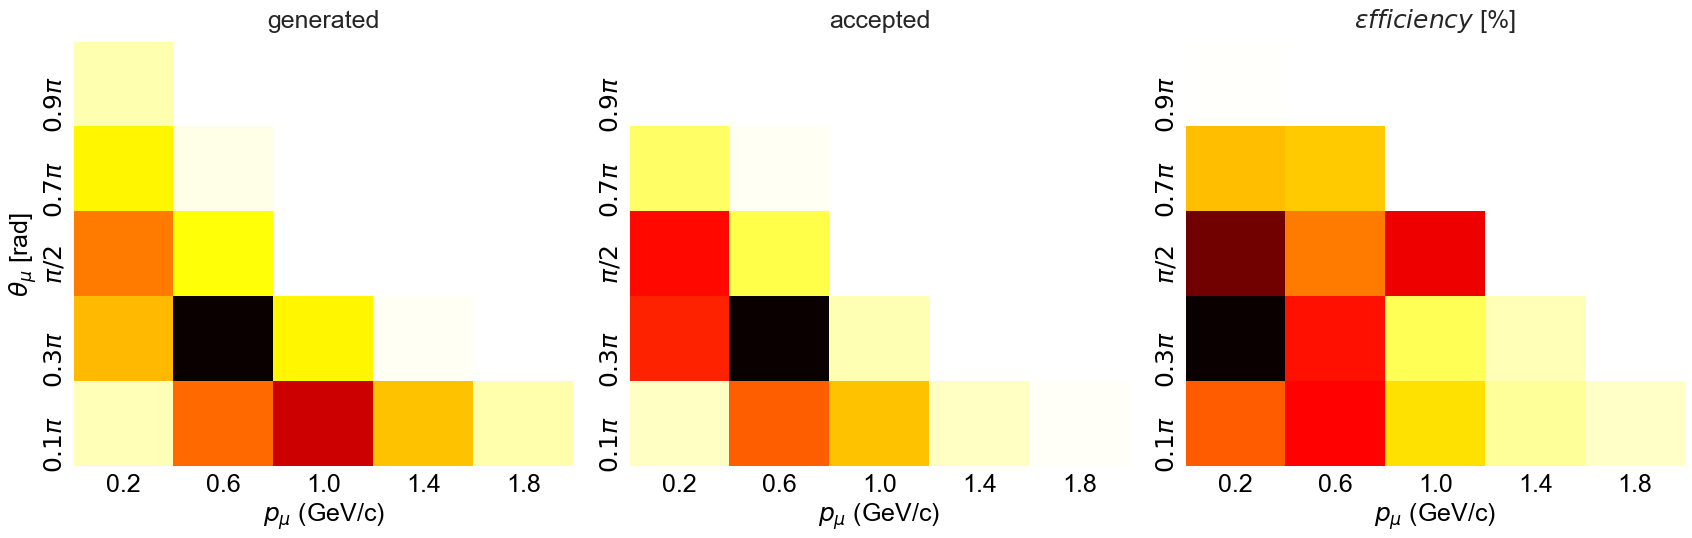

In [14]:
fig = plt.figure(figsize=(24,8))
sns.set(font_scale=2);
for i,(h,title) in enumerate(zip([hgen,hacc,heff],['generated','accepted','$\epsilon fficiency$ [%]'])):
    ax = fig.add_subplot(1,3,i+1)
    sns.heatmap(h,annot=False,cmap='hot_r'
                ,xticklabels=xticklabels
                ,yticklabels=yticklabels
                ,cbar=False)
    set_axes(ax,x_label,y_label if i==0 else ''
             ,title=title)
    ax.invert_yaxis()
plt.tight_layout()

## purity

In [15]:
overlay = overlay_tightFV
cc1p0pi = selected_CC1p0pi_tightFV
hall,hcc1p0pi,hpur,hpur_err = np.zeros((nx,ny)),np.zeros((nx,ny)),np.zeros((nx,ny)),np.zeros((nx,ny))
for ix in range(nx):
    xmin,xmax = xbins[ix],xbins[ix+1]
    for iy in range(ny):
        ymin,ymax = ybins[iy],ybins[iy+1]
        all_bin = overlay[(overlay[xvar]>xmin)&(overlay[xvar]<xmax)
                            &(overlay[yvar]>ymin)&(overlay[yvar]<ymax)]
        hall[ix][iy] = len(all_bin)        
        cc1p0pi_bin = cc1p0pi[(cc1p0pi[xvar]>xmin)&(cc1p0pi[xvar]<xmax)
                            &(cc1p0pi[yvar]>ymin)&(cc1p0pi[yvar]<ymax)]
        hcc1p0pi[ix][iy] = len(cc1p0pi_bin)  
        
        hpur[ix][iy] = float(hcc1p0pi[ix][iy])/(hall[ix][iy] if hall[ix][iy]>0 else 1)                
        hpur_err[ix][iy] = hpur[ix][iy]*np.sqrt( (1./hall[ix][iy] if hall[ix][iy] else 0)
                                                + (1./hcc1p0pi[ix][iy] if hcc1p0pi[ix][iy] else 0) )

hall,hcc1p0pi,hpur,hpur_err = hall.T,hcc1p0pi.T,hpur.T,hpur_err.T
print 'done'

done


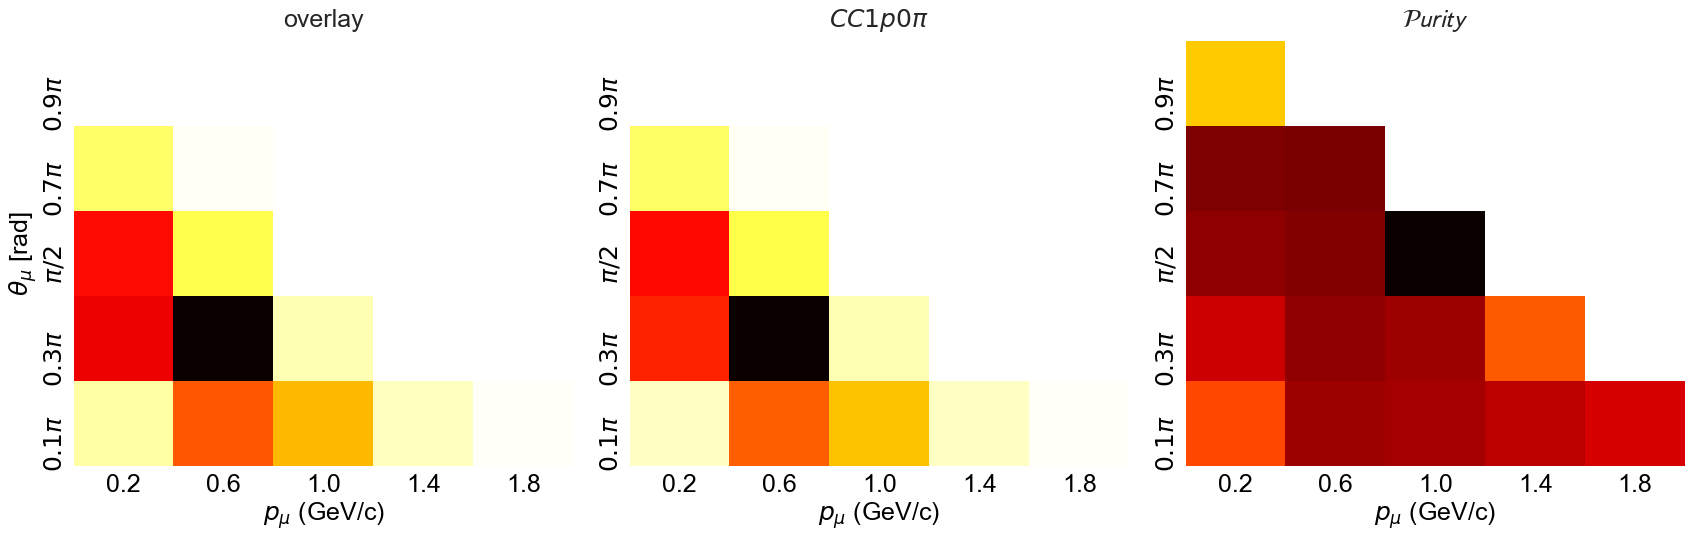

In [16]:
fig = plt.figure(figsize=(24,8))
sns.set(font_scale=2);
for i,(h,title) in enumerate(zip([hall,hcc1p0pi,hpur],['overlay','$CC1p0\pi$','$\mathcal{Purity}$'])):
    ax = fig.add_subplot(1,3,i+1)
    sns.heatmap(h,annot=False,cmap='hot_r'
                ,xticklabels=xticklabels
                ,yticklabels=yticklabels
                ,cbar=False)
    set_axes(ax,x_label,y_label if i==0 else ''
             ,title=title
            )
    ax.invert_yaxis()
plt.tight_layout()

In [17]:
hacc = np.zeros((nx,ny))
herr = np.zeros((nx,ny))
herr_rel = np.zeros((nx,ny))
for ix in range(nx):
    for iy in range(ny):
        hacc[ix][iy] = heff[ix][iy]/(hpur[ix][iy] if hpur[ix][iy]>0 else 1)
        herr[ix][iy] = hacc[ix][iy]*np.sqrt( np.square(heff_err[ix][iy]/heff[ix][iy] if heff[ix][iy] else 0) 
                                            + np.square(hpur_err[ix][iy]/hpur[ix][iy] if hpur[ix][iy] else 0) )
        herr_rel[ix][iy] = herr[ix][iy]/hacc[ix][iy] if hacc[ix][iy]>0 else 0
print 'done'

done


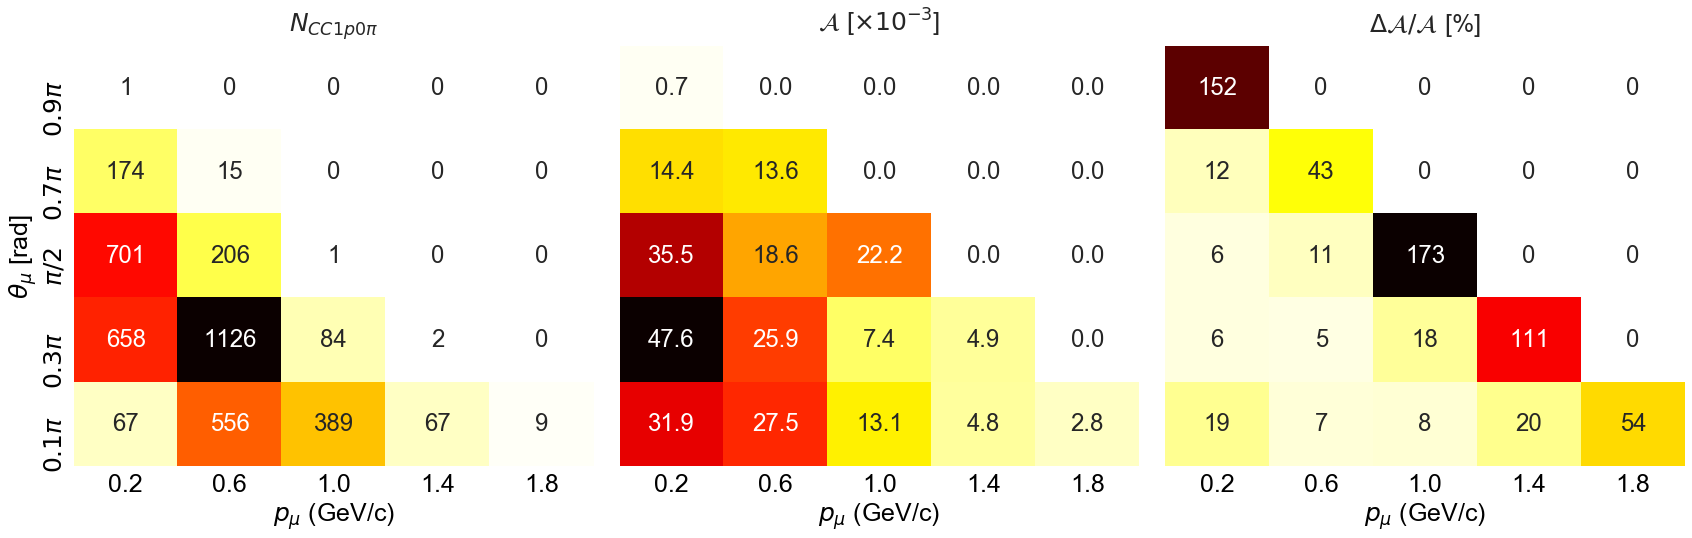

In [209]:
fig = plt.figure(figsize=(24,8))
for ih,(h,title) in enumerate(zip([hcc1p0pi,hacc,100.*herr_rel]
                                  ,[r'$N_{CC1p0\pi}$',r'$\mathcal{A}$ [$\times 10^{-3}$]',r'$\Delta \mathcal{A} / \mathcal{A}$ [%]'])):
    ax = fig.add_subplot(1,3,ih+1)
    sns.heatmap( h.astype(np.int) if ih!=1 else 1000*h
                ,annot=True
                ,cmap='hot_r'
                ,fmt="d" if ih!=1 else ".1f"
                ,xticklabels=xticklabels,yticklabels=yticklabels,cbar=False)
    set_axes(ax,x_label,y_label if ih==0 else '',remove_ticks_y=False if ih==0 else True,title=title)    
    ax.invert_yaxis()
plt.tight_layout()

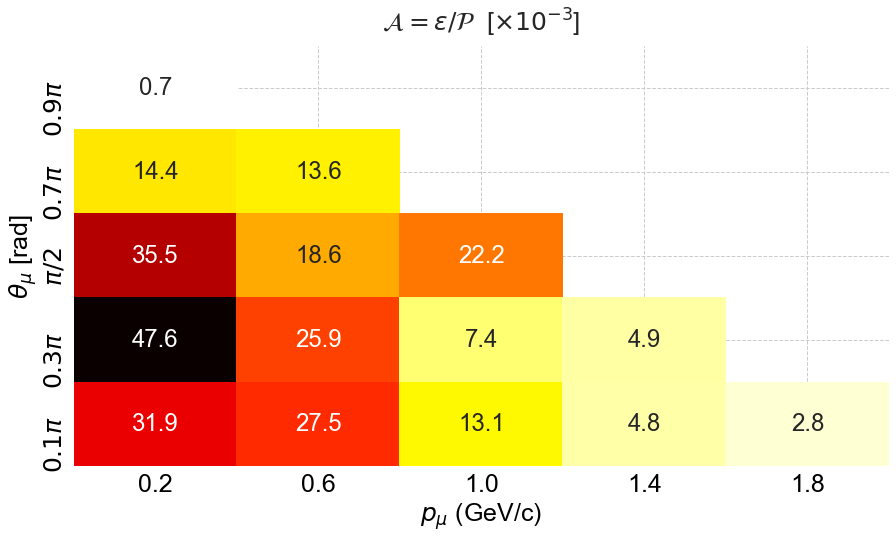

In [212]:
fig = plt.figure(figsize=(12.944,8))
ax = fig.add_subplot(1,1,1)
hacc_draw = 1000.*hacc
hacc_draw[hacc_draw <= 0] = None
sns.set_style('white')
sns.heatmap(hacc_draw,annot=True,cmap='hot_r',fmt=".1f",vmin=None
                ,xticklabels=xticklabels
                ,yticklabels=yticklabels
                ,cbar=False)
set_axes(ax,x_label,y_label,title=r'$\mathcal{A} = \varepsilon/\mathcal{P}$  [$\times 10^{-3}$]',do_add_grid=True,alpha_grid=1)
ax.invert_yaxis()
plt.tight_layout()

## save into a csv file

In [211]:
mapname='Pmu_theta'
for array,name in zip([xbins,ybins,hacc,herr]
                      ,['xbins','ybins','acceptance','acc_err']):
    print name,':',array
    filename="/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/acceptance_maps/%s_%dx%d_bins_%s.csv"%(mapname,nx,ny,name)
    np.savetxt(filename, array, delimiter=",")
    print 'saved',name,'into\n',filename

xbins : [ 0.   0.4  0.8  1.2  1.6  2. ]
saved xbins into
/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/acceptance_maps/Pmu_theta_5x5_bins_xbins.csv
ybins : [ 0.          0.62831853  1.25663706  1.88495559  2.51327412  3.14159265]
saved ybins into
/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/acceptance_maps/Pmu_theta_5x5_bins_ybins.csv
acceptance : [[ 0.03190153  0.02751693  0.01309863  0.00481787  0.00281081]
 [ 0.04759702  0.02594656  0.00737453  0.00494438  0.        ]
 [ 0.03552514  0.01858955  0.02222222  0.          0.        ]
 [ 0.01440568  0.01362604  0.          0.          0.        ]
 [ 0.00069156  0.          0.          0.          0.        ]]
saved acceptance into
/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/acceptance_maps/Pmu_theta_5x5_bins_acceptance.csv
acc_err : [[ 0.00621679  0.00195239  0.00110709  0.00097427  0.00153791]
 [ 0.00307391  0.00129819  0.00134243  0.00553071  0.        ]
 [ 0.00225818  0.00217988  0.03863231  0.          0.  

# What is the acceptance as a function of $p_p$ and $\theta_p$ in different bins of $p_\mu$ and $\theta_\mu$

In [109]:
large_bins_Pmu_min = np.array([0,0.45])
large_bins_Pmu_max = np.array([large_bins_Pmu_min[1],2])
large_bins_Pmu_centers = 0.5*(large_bins_Pmu_min+large_bins_Pmu_max)
large_bins_Pmu_theta_min = np.array([0,0.3*np.pi])
large_bins_Pmu_theta_max = np.array([large_bins_Pmu_theta_min[1],np.pi])
large_bins_Pmu_theta_centers = 0.5*(large_bins_Pmu_theta_min+large_bins_Pmu_theta_max)

hcc1p0pi_muon_bins = np.zeros((2,2))

# proton acceptance parameters
Pp_bins = linspace(0,1.4,6)
Pp_theta_bins = linspace(0,np.pi,6)
Pp_xcenters,Pp_theta_ycenters = 0.5*(Pp_bins[1:]+Pp_bins[:-1]),0.5*(Pp_theta_bins[1:]+Pp_theta_bins[:-1])
nx_p,ny_p = len(Pp_bins)-1,len(Pp_theta_bins)-1


In [110]:
def sample_in_xy_bin(sample,xmin,xmax,ymin,ymax,xvar,yvar):
    return sample[(sample[xvar]>xmin)&(sample[xvar]<xmax)&(sample[yvar]>ymin)&(sample[yvar]<ymax)]
def sample_in_muon_bin(sample,Pmu_min,Pmu_max,Pmu_theta_min,Pmu_theta_max):
    return sample_in_xy_bin(sample,Pmu_min,Pmu_max,Pmu_theta_min,Pmu_theta_max,xvar='truth_Pmu',yvar='truth_Pmu_theta')
def sample_in_proton_bin(sample,Pp_min,Pp_max,Pp_theta_min,Pp_theta_max):
    return sample_in_xy_bin(sample,Pp_min,Pp_max,Pp_theta_min,Pp_theta_max,xvar='truth_Pp',yvar='truth_Pp_theta')

In [111]:
h_p_acc,h_p_err,h_p_err_rel = dict(),dict(),dict()
for iPmu,(Pmu_min,Pmu_max) in enumerate(zip(large_bins_Pmu_min,large_bins_Pmu_max)):
    for iPmu_theta,(Pmu_theta_min,Pmu_theta_max) in enumerate(zip(large_bins_Pmu_theta_min,large_bins_Pmu_theta_max)):
        print 'len(selected_CC1p0pi_tightFV):',len(selected_CC1p0pi_tightFV)
        selected_cc1p0pi_muon_bin = sample_in_muon_bin(selected_CC1p0pi_tightFV,Pmu_min,Pmu_max,Pmu_theta_min,Pmu_theta_max)
        generated_muon_bin = sample_in_muon_bin(GENIE_CC1p0pi,Pmu_min,Pmu_max,Pmu_theta_min,Pmu_theta_max)        
        overlay_muon_bin = sample_in_muon_bin(overlay_tightFV,Pmu_min,Pmu_max,Pmu_theta_min,Pmu_theta_max)        

        hcc1p0pi_muon_bins[iPmu][iPmu_theta] = len(selected_cc1p0pi_muon_bin)
        print 'hcc1p0pi_muon_bins[iPmu][iPmu_theta]:',hcc1p0pi_muon_bins[iPmu][iPmu_theta]
        
        # now check the proton acceptance in this muon-kinematics bin
        hgen,hacc,heff,heff_err = np.zeros((nx_p,ny_p)),np.zeros((nx_p,ny_p)),np.zeros((nx_p,ny_p)),np.zeros((nx_p,ny_p))
        hall,hcc1p0pi,hpur,hpur_err = np.zeros((nx_p,ny_p)),np.zeros((nx_p,ny_p)),np.zeros((nx_p,ny_p)),np.zeros((nx_p,ny_p))
        hacc,herr,herr_rel = np.zeros((nx_p,ny_p)),np.zeros((nx_p,ny_p)),np.zeros((nx_p,ny_p))


        for iPp in range(nx_p):
            Pp_min,Pp_max = Pp_bins[iPp],Pp_bins[iPp+1]    
            for iPp_theta in range(ny_p):
                Pp_theta_min,Pp_theta_max = Pp_theta_bins[iPp_theta],Pp_theta_bins[iPp_theta+1]        

                # efficiency
                gen_proton_bin = sample_in_proton_bin(generated_muon_bin,Pp_min,Pp_max,Pp_theta_min,Pp_theta_max)            
                acc_proton_bin = sample_in_proton_bin(selected_cc1p0pi_muon_bin,Pp_min,Pp_max,Pp_theta_min,Pp_theta_max)

                hgen[iPp][iPp_theta] = len(gen_proton_bin)        
                hacc[iPp][iPp_theta] = len(acc_proton_bin)        
                heff[iPp][iPp_theta] = float(hacc[iPp][iPp_theta])/(hgen[iPp][iPp_theta] if hgen[iPp][iPp_theta]>0 else 1)
                heff_err[iPp][iPp_theta] = heff[iPp][iPp_theta]*np.sqrt( (1./hgen[iPp][iPp_theta] if hgen[iPp][iPp_theta] else 0)                                                    
                                                                + (1./hacc[iPp][iPp_theta] if hacc[iPp][iPp_theta] else 0) )

                # purity 
                overlay_proton_bin = sample_in_proton_bin(overlay_muon_bin,Pp_min,Pp_max,Pp_theta_min,Pp_theta_max)            
                cc1p0pi_proton_bin = sample_in_proton_bin(selected_cc1p0pi_muon_bin,Pp_min,Pp_max,Pp_theta_min,Pp_theta_max)

                hall[iPp][iPp_theta] = len(overlay_proton_bin)        
                hcc1p0pi[iPp][iPp_theta] = len(cc1p0pi_proton_bin)          
                hpur[iPp][iPp_theta] = float(hcc1p0pi[iPp][iPp_theta])/(hall[iPp][iPp_theta] if hall[iPp][iPp_theta]>0 else 1)                
                hpur_err[iPp][iPp_theta] = hpur[iPp][iPp_theta]*np.sqrt( (1./hall[iPp][iPp_theta] if hall[iPp][iPp_theta] else 0)                                                
                                                                        + (1./hcc1p0pi[iPp][iPp_theta] if hcc1p0pi[iPp][iPp_theta] else 0) )

                # acceptance 
                hacc[iPp][iPp_theta] = heff[iPp][iPp_theta]/(hpur[iPp][iPp_theta] if hpur[iPp][iPp_theta]>0 else 1)
                herr[iPp][iPp_theta] = hacc[iPp][iPp_theta]*np.sqrt( np.square(heff_err[iPp][iPp_theta]/heff[iPp][iPp_theta] if heff[iPp][iPp_theta] else 0) 
                                                    + np.square(hpur_err[iPp][iPp_theta]/hpur[iPp][iPp_theta] if hpur[iPp][iPp_theta] else 0) )
                herr_rel[iPp][iPp_theta] = herr[iPp][iPp_theta]/hacc[iPp][iPp_theta] if hacc[iPp][iPp_theta]>0 else 0

        h_p_acc['iPmu %d iPmu_theta %d'%(iPmu,iPmu_theta)] = hacc.T
        h_p_err['iPmu %d iPmu_theta %d'%(iPmu,iPmu_theta)] = herr.T
        h_p_err_rel['iPmu %d iPmu_theta %d'%(iPmu,iPmu_theta)] = herr_rel.T
print 'done.'

len(selected_CC1p0pi_tightFV): 4064
hcc1p0pi_muon_bins[iPmu][iPmu_theta]: 440.0
len(selected_CC1p0pi_tightFV): 4064
hcc1p0pi_muon_bins[iPmu][iPmu_theta]: 1543.0
len(selected_CC1p0pi_tightFV): 4064
hcc1p0pi_muon_bins[iPmu][iPmu_theta]: 1651.0
len(selected_CC1p0pi_tightFV): 4064
hcc1p0pi_muon_bins[iPmu][iPmu_theta]: 422.0
done.


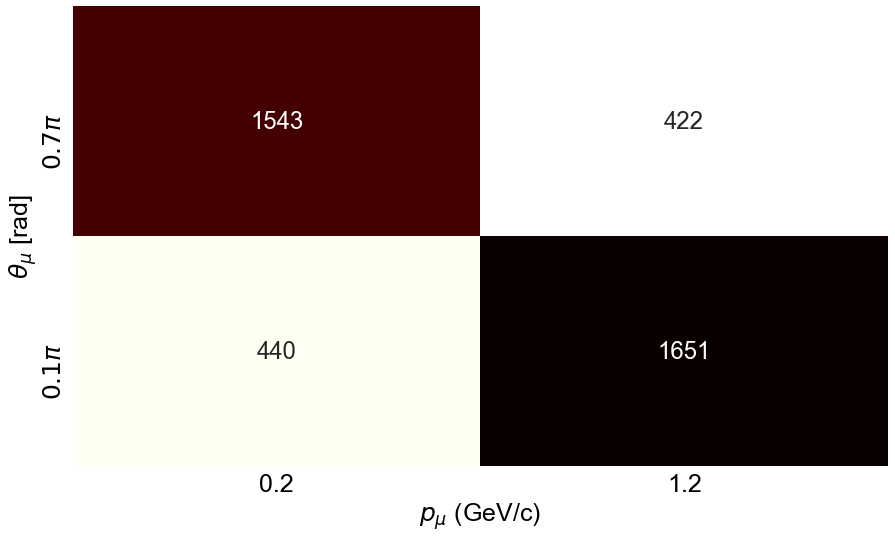

In [112]:
fig = plt.figure(figsize=(12.944,8))
ax = fig.add_subplot(1,1,1)
sns.heatmap(hcc1p0pi_muon_bins.T.astype(np.int),annot=True,cmap='hot_r',fmt="d"         
            ,xticklabels=["%.1f"%tick for tick in large_bins_Pmu_centers]
            ,yticklabels=["$%.1f\pi$"%(tick/np.pi) for tick in large_bins_Pmu_theta_centers]
            ,cbar=False)
set_axes(ax,r'$p_\mu$ (GeV/c)',r'$\theta_\mu$ [rad]')
ax.invert_yaxis()
plt.tight_layout()

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in less_equal


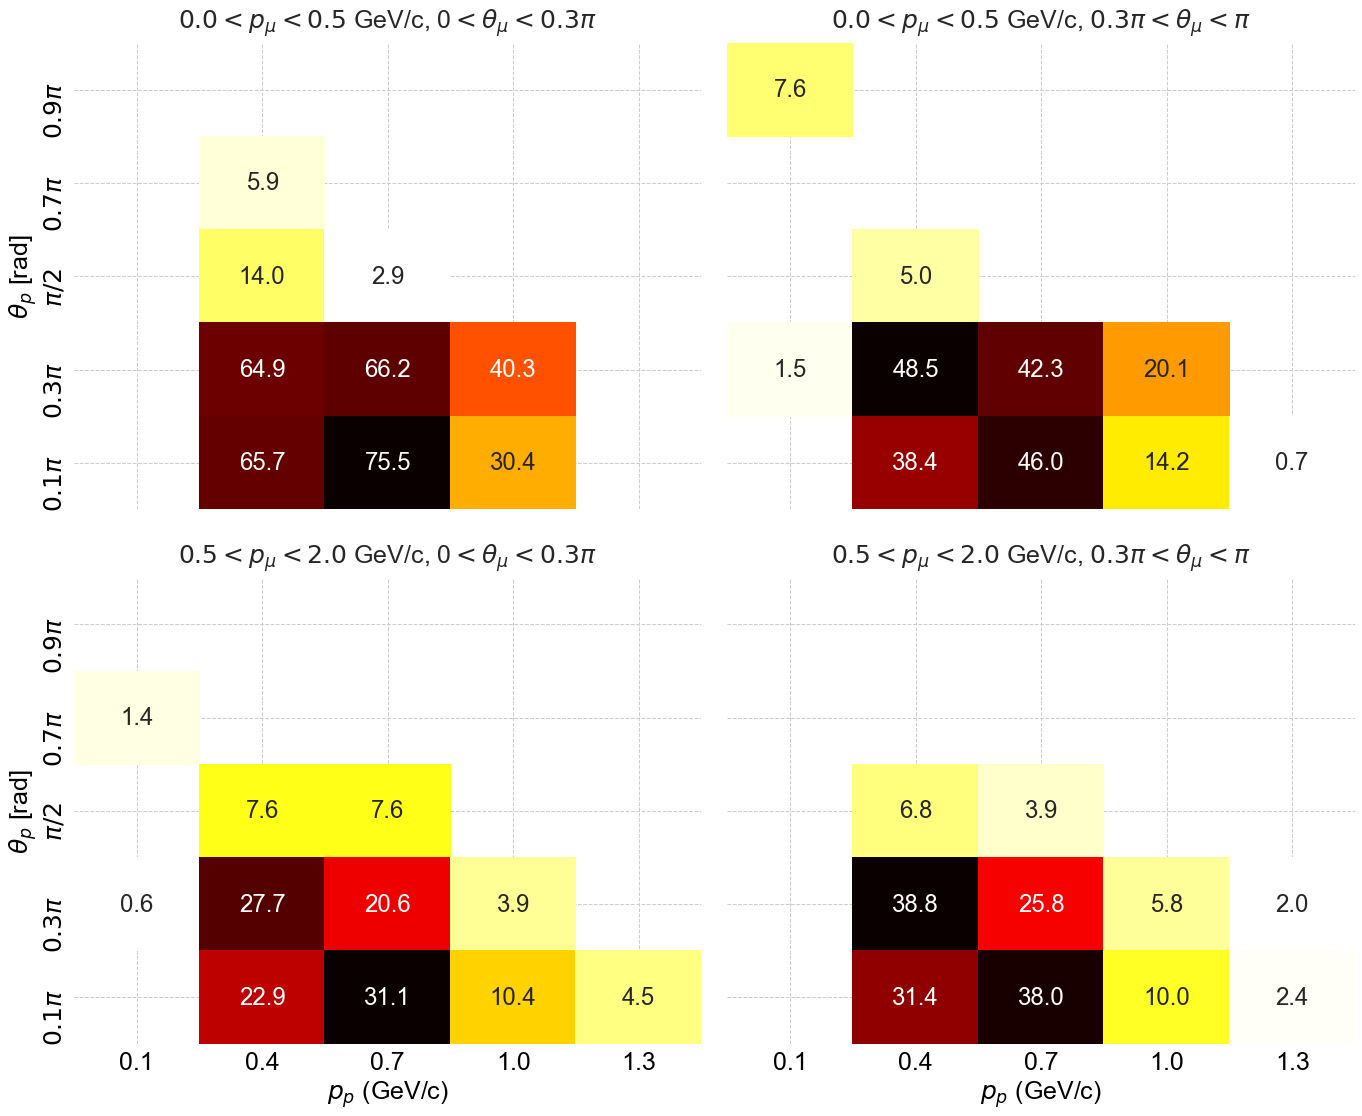

In [175]:
fig = plt.figure(figsize=(19.416,16))
for iPmu,(Pmu_min,Pmu_max) in enumerate(zip(large_bins_Pmu_min,large_bins_Pmu_max)):
    for iPmu_theta,(Pmu_theta_min,Pmu_theta_max) in enumerate(zip(large_bins_Pmu_theta_min,large_bins_Pmu_theta_max)):
        ax = fig.add_subplot(2,2,2*iPmu+iPmu_theta+1)
        histo = h_p_acc['iPmu %d iPmu_theta %d'%(iPmu,iPmu_theta)]
        histo[histo <= 0] = None
        sns.heatmap(1000.*histo,annot=True,cmap='hot_r',fmt=".1f",vmin=None
            ,xticklabels=["%.1f"%tick for tick in Pp_xcenters]
            ,yticklabels=[theta_rad_label(tick) for tick in Pp_theta_ycenters]
            ,cbar=False)
        set_axes(ax,do_add_grid=True,alpha_grid=1
                 ,x_label='' if iPmu==0 else  r'$p_p$ (GeV/c)'
                 ,remove_ticks_x=True if iPmu==0 else False
                 ,y_label=''  if iPmu_theta==1 or iPmu_theta==3 else  r'$\theta_p$ [rad]'
                 ,remove_ticks_y=True if iPmu_theta==1 or iPmu_theta==3 else False
                 ,title=r'$%.1f<p_\mu<%.1f$ GeV/c, %s$<\theta_\mu<$%s'%(Pmu_min,Pmu_max,theta_rad_label(Pmu_theta_min),theta_rad_label(Pmu_theta_max))
                 )
        ax.invert_yaxis()
plt.tight_layout()

## overlay efficiency and purity as a function of $p_p$ and $\theta_p$

In [18]:
Pp_bins = linspace(0,1.4,9)
Pp_theta_bins = linspace(0,np.pi,9)
xbins,ybins = Pp_bins,Pp_theta_bins
xcenters,ycenters = 0.5*(xbins[1:]+xbins[:-1]),0.5*(ybins[1:]+ybins[:-1])
nx,ny = len(xbins)-1,len(ybins)-1
xvar,yvar = 'truth_Pp','truth_Pp_theta'
xticklabels=["%.1f"%x for x in xcenters]
yticklabels=[theta_rad_label(tick) for tick in ycenters]
x_label,y_label=r'$p_p$ (GeV/c)',r'$\theta_p$ [rad]'

## efficiency

In [38]:
generated = GENIE_CC1p0pi
accepted = selected_CC1p0pi_tightFV
hgen,hacc,heff,heff_err = np.zeros((nx,ny)),np.zeros((nx,ny)),np.zeros((nx,ny)),np.zeros((nx,ny))
for ix in range(nx):
    xmin,xmax = xbins[ix],xbins[ix+1]    #print "xmin,xmax:",xmin,xmax
    for iy in range(ny):
        ymin,ymax = ybins[iy],ybins[iy+1]        #print "ymin,ymax:",ymin,ymax        
        gen_bin = generated[(generated[xvar]>xmin)&(generated[xvar]<xmax)
                            &(generated[yvar]>ymin)&(generated[yvar]<ymax)]
        hgen[ix][iy] = len(gen_bin)        
        acc_bin = accepted[(accepted[xvar]>xmin)&(accepted[xvar]<xmax)
                            &(accepted[yvar]>ymin)&(accepted[yvar]<ymax)]
        hacc[ix][iy] = len(acc_bin)        
        heff[ix][iy] = float(hacc[ix][iy])/(hgen[ix][iy] if hgen[ix][iy]>0 else 1)
        heff_err[ix][iy] = heff[ix][iy]*np.sqrt( (1./hgen[ix][iy] if hgen[ix][iy] else 0)
                                                + (1./hacc[ix][iy] if hacc[ix][iy] else 0) )
hgen,hacc,heff,heff_err=hgen.T,hacc.T,heff.T,heff_err.T
print 'done'

done


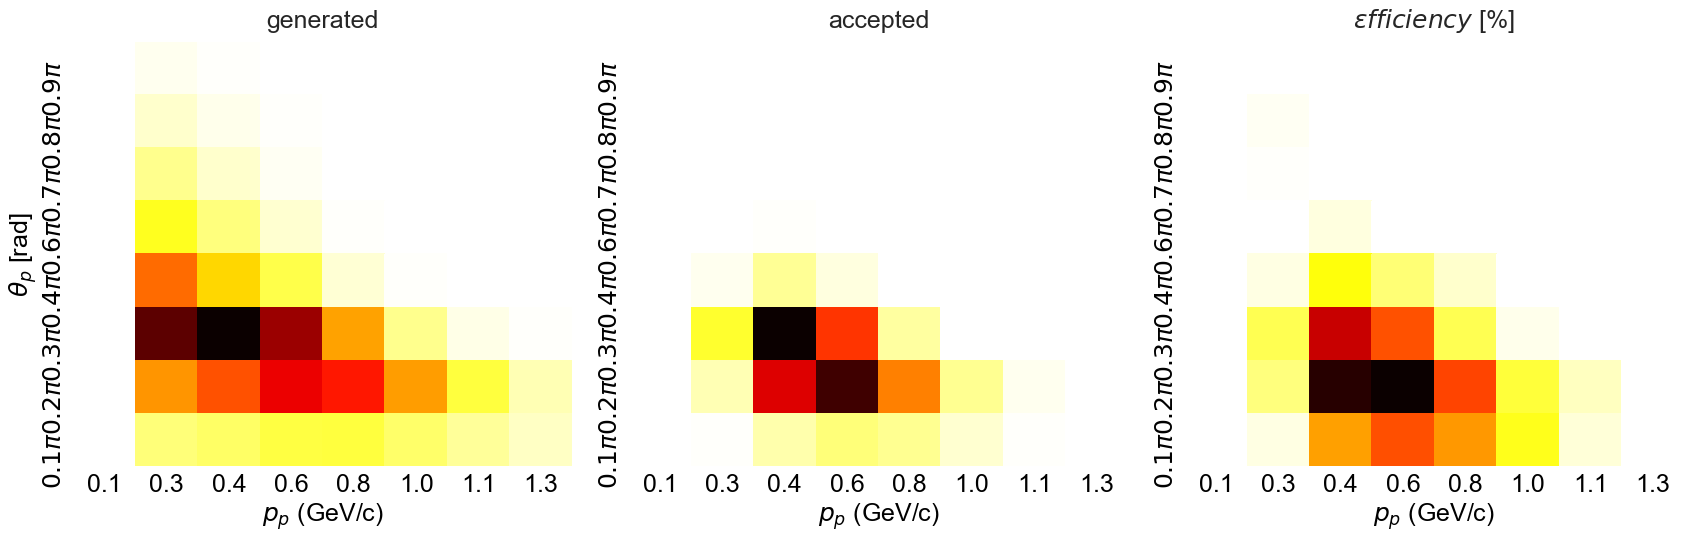

In [39]:
fig = plt.figure(figsize=(24,8))
sns.set(font_scale=2);
for i,(h,title) in enumerate(zip([hgen,hacc,heff],['generated','accepted','$\epsilon fficiency$ [%]'])):
    ax = fig.add_subplot(1,3,i+1)
    sns.heatmap(h,annot=False,cmap='hot_r'
                ,xticklabels=xticklabels,yticklabels=yticklabels,cbar=False)
    set_axes(ax,x_label,y_label if i==0 else ''
             ,title=title)
    ax.invert_yaxis()
plt.tight_layout()

## purity

In [40]:
overlay = overlay_tightFV
cc1p0pi = selected_CC1p0pi_tightFV
hall,hcc1p0pi,hpur,hpur_err = np.zeros((nx,ny)),np.zeros((nx,ny)),np.zeros((nx,ny)),np.zeros((nx,ny))
for ix in range(nx):
    xmin,xmax = xbins[ix],xbins[ix+1]
    for iy in range(ny):
        ymin,ymax = ybins[iy],ybins[iy+1]
        all_bin = overlay[(overlay[xvar]>xmin)&(overlay[xvar]<xmax)
                            &(overlay[yvar]>ymin)&(overlay[yvar]<ymax)]
        hall[ix][iy] = len(all_bin)        
        cc1p0pi_bin = cc1p0pi[(cc1p0pi[xvar]>xmin)&(cc1p0pi[xvar]<xmax)
                            &(cc1p0pi[yvar]>ymin)&(cc1p0pi[yvar]<ymax)]
        hcc1p0pi[ix][iy] = len(cc1p0pi_bin)          
        hpur[ix][iy] = float(hcc1p0pi[ix][iy])/(hall[ix][iy] if hall[ix][iy]>0 else 1)                
        hpur_err[ix][iy] = heff[ix][iy]*np.sqrt( (1./hall[ix][iy] if hall[ix][iy] else 0)
                                                + (1./hcc1p0pi[ix][iy] if hcc1p0pi[ix][iy] else 0) )

hall,hcc1p0pi,hpur,hpur_err = hall.T,hcc1p0pi.T,hpur.T,hpur_err.T
print 'done'

done


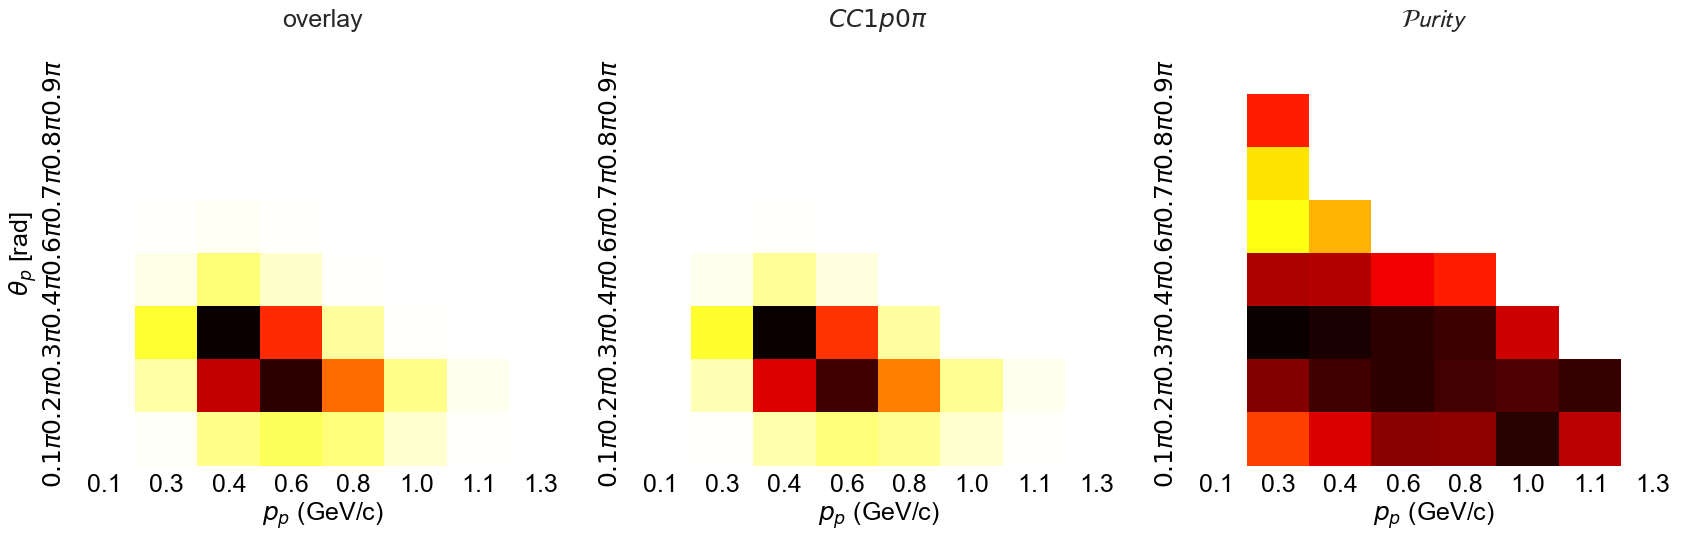

In [41]:
fig = plt.figure(figsize=(24,8))
sns.set(font_scale=2);
for i,(h,title) in enumerate(zip([hall,hcc1p0pi,hpur],['overlay','$CC1p0\pi$','$\mathcal{Purity}$'])):
    ax = fig.add_subplot(1,3,i+1)
    sns.heatmap(h,annot=False,cmap='hot_r'
                ,xticklabels=xticklabels,yticklabels=yticklabels,cbar=False)
    set_axes(ax,x_label,y_label if i==0 else '',title=title)
    ax.invert_yaxis()
plt.tight_layout()

In [42]:
hacc,herr,herr_rel = np.zeros((nx,ny)),np.zeros((nx,ny)),np.zeros((nx,ny))
for ix in range(nx):
    for iy in range(ny):
        hacc[ix][iy] = heff[ix][iy]/(hpur[ix][iy] if hpur[ix][iy]>0 else 1)
        herr[ix][iy] = hacc[ix][iy]*np.sqrt( np.square(heff_err[ix][iy]/heff[ix][iy] if heff[ix][iy] else 0) 
                                            + np.square(hpur_err[ix][iy]/hpur[ix][iy] if hpur[ix][iy] else 0) )
        herr_rel[ix][iy] = herr[ix][iy]/hacc[ix][iy] if hacc[ix][iy]>0 else 0
print 'done'

done


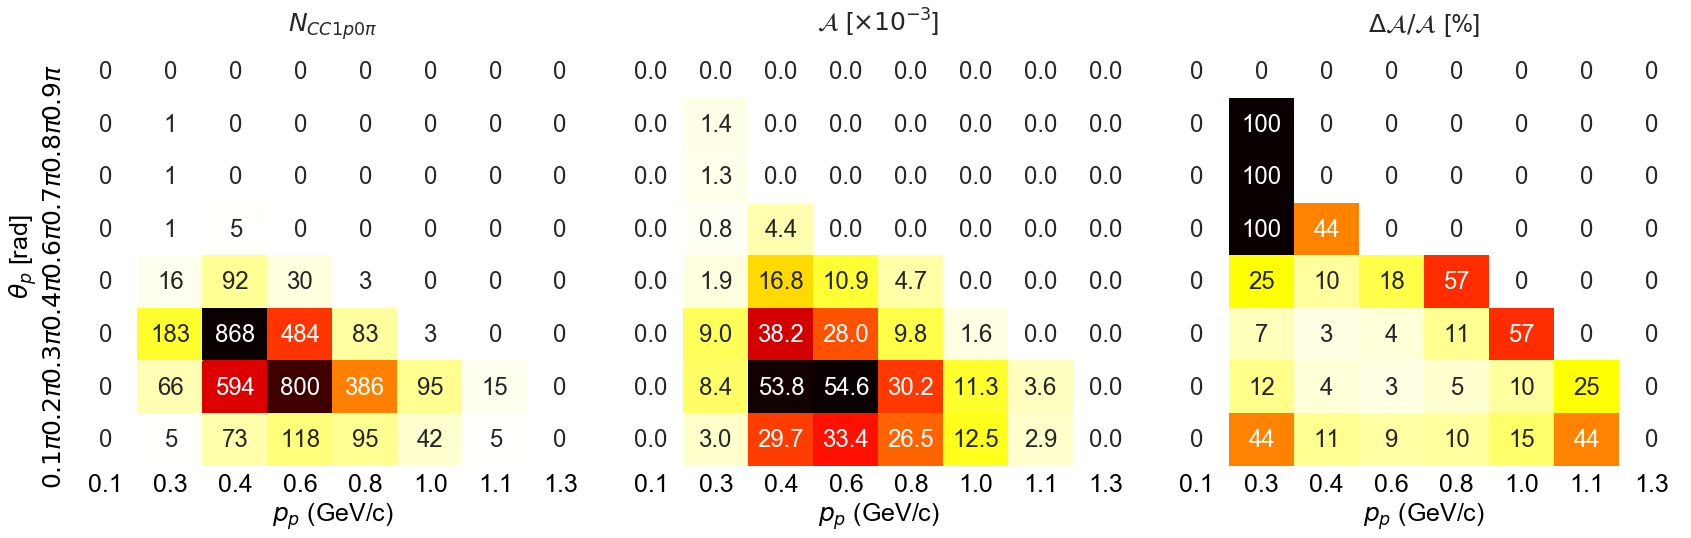

In [43]:
fig = plt.figure(figsize=(24,8))
for ih,(h,title) in enumerate(zip([hcc1p0pi,hacc,100.*herr_rel]
                                  ,[r'$N_{CC1p0\pi}$',r'$\mathcal{A}$ [$\times 10^{-3}$]',r'$\Delta \mathcal{A} / \mathcal{A}$ [%]'])):
    ax = fig.add_subplot(1,3,ih+1)
    sns.heatmap( h.astype(np.int) if ih!=1 else 1000.*h
                ,annot=True
                ,cmap='hot_r'
                ,fmt="d" if ih!=1 else ".1f"
                ,xticklabels=xticklabels,yticklabels=yticklabels,cbar=False)
    set_axes(ax,x_label,y_label if ih==0 else '',remove_ticks_y=False if ih==0 else True,title=title)    
    ax.invert_yaxis()
plt.tight_layout()

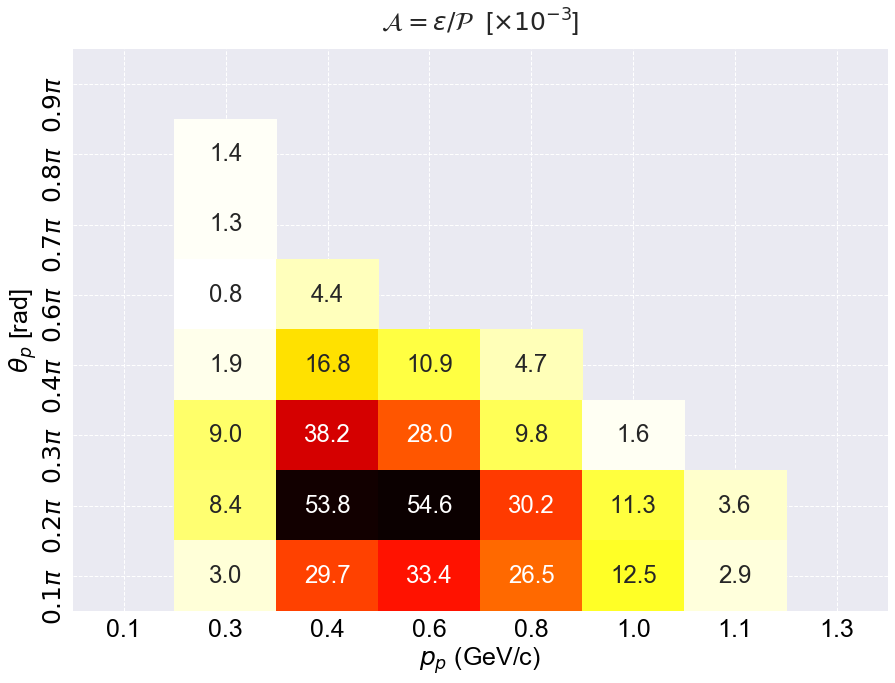

In [44]:
fig = plt.figure(figsize=(12.944,10))
ax = fig.add_subplot(1,1,1)
hacc_draw = 1000.*hacc
hacc_draw[hacc_draw <= 0] = None
sns.set_style('white')
sns.heatmap(hacc_draw,annot=True,cmap='hot_r',fmt=".1f",vmin=None               
            ,xticklabels=xticklabels
            ,yticklabels=yticklabels
            ,cbar=False)
set_axes(ax,x_label,y_label,title=r'$\mathcal{A} = \varepsilon/\mathcal{P}$  [$\times 10^{-3}$]',do_add_grid=True,alpha_grid=1)
ax.invert_yaxis()
plt.tight_layout()

## save into a csv file

In [45]:
mapname='Pp_theta'
for array,name in zip([xbins,ybins,hacc,herr]
                      ,['xbins','ybins','acceptance','acc_err']):
    print name,':',array
    filename="/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/acceptance_maps/%s_%dx%d_bins_%s.csv"%(mapname,nx,ny,name)
    np.savetxt(filename, array, delimiter=",")
    print 'saved',name,'into\n',filename

xbins : [ 0.     0.175  0.35   0.525  0.7    0.875  1.05   1.225  1.4  ]
saved xbins into
/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/acceptance_maps/Pp_theta_8x8_bins_xbins.csv
ybins : [ 0.          0.39269908  0.78539816  1.17809725  1.57079633  1.96349541
  2.35619449  2.74889357  3.14159265]
saved ybins into
/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/acceptance_maps/Pp_theta_8x8_bins_ybins.csv
acceptance : [[ 0.          0.00295144  0.02973359  0.03342349  0.02650009  0.01245807
   0.00285919  0.        ]
 [ 0.          0.00839     0.05378697  0.05458635  0.03024414  0.01130915
   0.00360463  0.        ]
 [ 0.          0.00896489  0.03821425  0.02795579  0.0098449   0.00157629
   0.          0.        ]
 [ 0.          0.00191762  0.01684675  0.01089369  0.00473934  0.          0.
   0.        ]
 [ 0.          0.00080775  0.00439198  0.          0.          0.          0.
   0.        ]
 [ 0.          0.00125826  0.          0.          0.          0.          0

## now run calculation of weights on GENIE samples:
> make && python mac/genie_to_csv.py -mA=0.99 -evf=1

# afro GENIE samples with different $m_A$

In [46]:
sns.set(style='white');
mA_array = [0.6,0.7,0.8,0.9,0.99,1.1,1.2,1.4]
mA_colors= ['red','blue','yellow','forestgreen','purple','orange','pink','teal']
 # S.Dytman: GENIE assumes mA=0.99 GeV/c2 (Dec-30,2017)

In [47]:
genie_CC1p0pi = dict()
for mA in mA_array:
    genie_sample = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/mA/afro_genie_samples/CC_100k_mA_%.2f.csv'%mA)
    genie_CC1p0pi[mA] = genie_sample[genie_sample['IsCC_1p_200MeVc_0pi']==True]
    print len(genie_CC1p0pi[mA]),'CC1p0π events in GENIE samples with mA=%.2f'%mA

28507 CC1p0π events in GENIE samples with mA=0.60
30599 CC1p0π events in GENIE samples with mA=0.70
32163 CC1p0π events in GENIE samples with mA=0.80
33824 CC1p0π events in GENIE samples with mA=0.90
34849 CC1p0π events in GENIE samples with mA=0.99
36196 CC1p0π events in GENIE samples with mA=1.10
37239 CC1p0π events in GENIE samples with mA=1.20
38810 CC1p0π events in GENIE samples with mA=1.40


# now extract $m_A$ from the $Q^2$ distribution

## The uncertainty of a weighted histogram:
A weighted histogram
$$ h_j = (\sum_{i=1}^{N} w_i)_j$$
and the uncertainty
$$ \Delta h_j 
= \sqrt{Var\left( \sum_i w_i \right)} 
= \sqrt{\sum_i  Var\left( w_i \right)}
= \sqrt{\sum_i w_i^2 Var\left( 1-event \right)} 
= \sqrt{\sum_i w_i^2}$$ 


In [50]:
def add_GENIE(mA=0.99,var='Q2',bins=None
              ,do_add_weights=True
              ,do_normalize=True,Integral_OnBeam=1
              ,color='black',debug=0):
    hGenie,hGenie_err = np.zeros(len(bins)-1),np.zeros(len(bins)-1)
    for i in range(len(bins)-1):
        genie_in_bin = genie_CC1p0pi[mA][(genie_CC1p0pi[mA][var]>bins[i])&(genie_CC1p0pi[mA][var]<bins[i+1])]
        if do_add_weights: weights_in_bin = genie_in_bin['MicroBooNEWeight_Pmu_theta_Pp_theta']
        else: weights_in_bin = np.ones(len(genie_in_bin))
        hGenie[i] = np.sum(weights_in_bin)
        hGenie_err[i] = np.sqrt(np.sum(np.square(weights_in_bin)))      
    if do_normalize:
        hGenie_err = hGenie_err*(Integral_OnBeam/np.float(np.sum(hGenie)))    
        hGenie = hGenie*(Integral_OnBeam/np.float(np.sum(hGenie)))
    if debug:
        print 'hGenie:',hGenie
        print 'hGenie_err:',hGenie_err

    chi2 , ndf = chi2_two_histograms( bins=bins, chi2_xrange=chi2_xrange                                     
                                         , h1=h_OnBeam , h1err=h_OnBeam_err
                                         , h2=hGenie ,  h2err=hGenie_err, debug=debug )
    plt.step(x=mid , y=hGenie , where='mid' ,color=color
             , label=('$m_A=%.2f$, '%mA             
                      + ('' if do_add_weights==True else 'no')                      
                      + r' $\mu$B weights, $\chi^2/ndf=%.1f/%d$'%(chi2,ndf)))

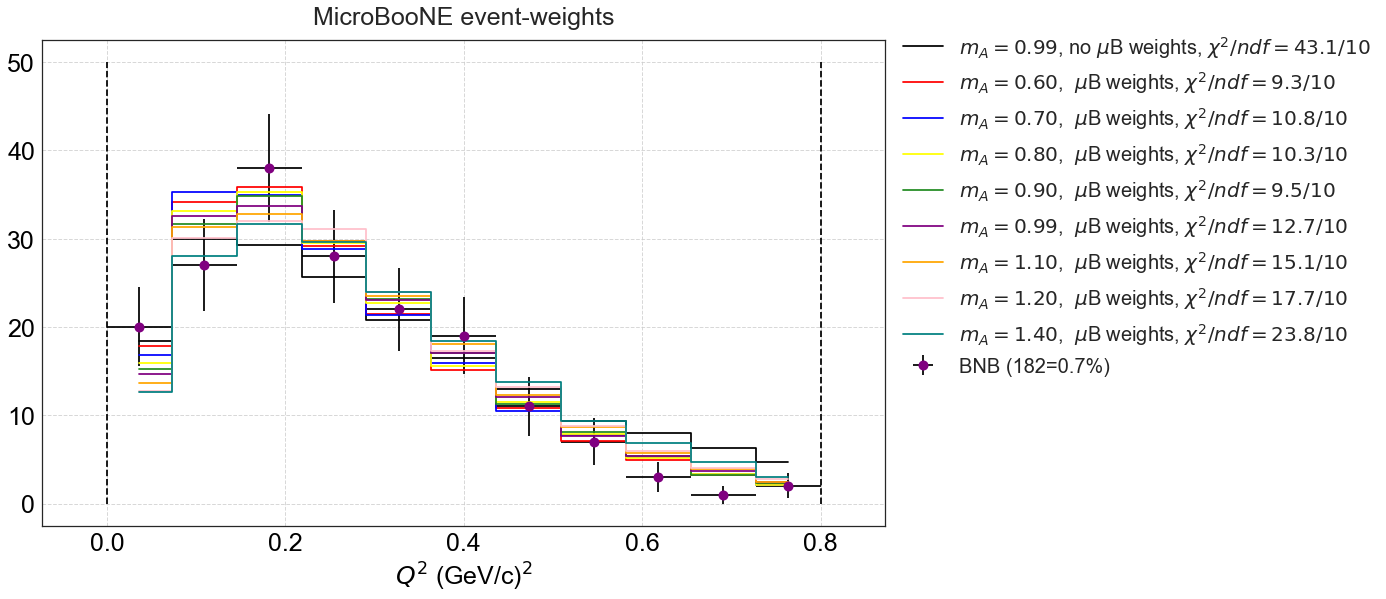

In [52]:
fig=plt.figure(figsize=(12.944,8));ax=fig.add_subplot(1,1,1)
bins=linspace(0,0.8,12); mid=0.5*(bins[1:]+bins[:-1])
chi2_xrange=(0,0.8)
x_label=r'$Q^2$ (GeV/c)$^2$'

_,h_OnBeam = plot_OnBeam(OnBeamSample=selected_events_tightFV,var='reco_Q2',
                         OnBeamFV=OnBeamFV,markersize=10,color='purple', bins=bins, ax=ax)
h_OnBeam_err = np.array([np.max([1,np.sqrt(h_OnBeam[i])]) for i in range(len(h_OnBeam))])
Integral_OnBeam = np.float(len(selected_events_tightFV))
add_GENIE(mA=0.99,do_add_weights=False,do_normalize=True,Integral_OnBeam=Integral_OnBeam,bins=bins,color='black')
for mA,color in zip(mA_array,mA_colors):
    add_GENIE(mA=mA,do_add_weights=True,Integral_OnBeam=Integral_OnBeam,bins=bins,color=color
              ,debug=0 if mA==0.99 else 0)
    if mA==0.99:
        ylim = (0,50)
        plt.plot([chi2_xrange[0],chi2_xrange[0]],ylim,'--',[chi2_xrange[1],chi2_xrange[1]],ylim,'--',color='black')
set_axes(ax,x_label,'',do_add_grid=True,title='MicroBooNE event-weights')
plt.legend(bbox_to_anchor=(1.,1.05),loc=2,fontsize=20)

## now extract $m_A$ from the distribution of $p_p$

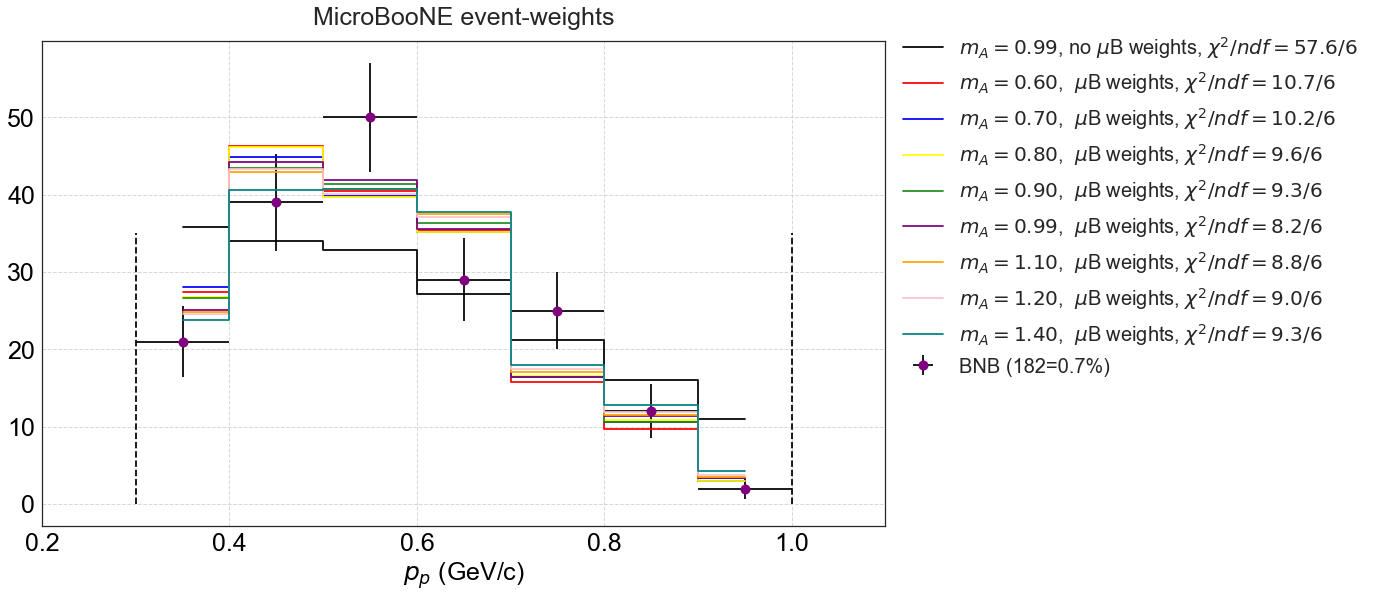

In [62]:
fig=plt.figure(figsize=(12.944,8));ax=fig.add_subplot(1,1,1)
bins=linspace(0.3,1.0,8); mid=0.5*(bins[1:]+bins[:-1])
chi2_xrange=(np.min(bins),np.max(bins))
x_label=r'$p_p$ (GeV/c)'

_,h_OnBeam = plot_OnBeam(OnBeamSample=selected_events_tightFV,var='reco_Pp',
                         OnBeamFV=OnBeamFV,markersize=10,color='purple', bins=bins, ax=ax)
h_OnBeam_err = np.array([np.max([1,np.sqrt(h_OnBeam[i])]) for i in range(len(h_OnBeam))])
Integral_OnBeam = np.float(np.sum(h_OnBeam))
add_GENIE(mA=0.99,var='Pp',do_add_weights=False,Integral_OnBeam=Integral_OnBeam,bins=bins,color='black')
for mA,color in zip(mA_array,mA_colors):
    add_GENIE(mA=mA,var='Pp',do_add_weights=True,Integral_OnBeam=Integral_OnBeam,bins=bins,color=color
              ,debug=0 if mA==0.99 else 0)
    if mA==0.99:
        ylim = (0,35)
        plt.plot([chi2_xrange[0],chi2_xrange[0]],ylim,'--',[chi2_xrange[1],chi2_xrange[1]],ylim,'--',color='black')
set_axes(ax,x_label,'',do_add_grid=True,title='MicroBooNE event-weights')
plt.legend(bbox_to_anchor=(1.,1.05),loc=2,fontsize=20)